In [1]:
import numpy as np 
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
file_paths = glob.glob('datasets/*.csv')

In [6]:
# Reading each CSV file and store in a list
dfs = []
for file_path in file_paths:
    # Avoiding reading metadata file
    if 'stock_metadata' not in file_path and 'NIFTY50_all' not in file_path:
        df = pd.read_csv(file_path, parse_dates=['Date'])
        df['Stock'] = file_path.split('/')[-1].replace('.csv', '')  # Adding stock name column
        dfs.append(df)

In [7]:
Nifty_50 = pd.concat(dfs, ignore_index=True)
Nifty_50.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Stock
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612,datasets\ADANIPORTS
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172,datasets\ADANIPORTS
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088,datasets\ADANIPORTS
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735,datasets\ADANIPORTS
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741,datasets\ADANIPORTS


In [8]:
Nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  object        
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [9]:
Nifty50=df

In [13]:
df['Daily Return'] = df['Close'].pct_change()



df['Prev Close'] = df['Close'].shift(1)
df['MA7'] = df['Close'].rolling(window=7).mean().shift(1)
df['MA30'] = df['Close'].rolling(window=30).mean().shift(1)
df['Volatility'] = df['Daily Return'].rolling(window=30).std().shift(1)

# Drop missing values
df.dropna(inplace=True)

In [14]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Stock', 'MA7', 'MA30', 'Daily Return', 'Volatility'],
      dtype='object')


In [15]:
print(Nifty_50.dtypes)
Nifty_50.index = pd.to_datetime(Nifty_50.index)
print('-----------------AFTER CHANGE ----------------')
print(Nifty_50.dtypes)

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                        object
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
Stock                         object
dtype: object
-----------------AFTER CHANGE ----------------
Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP          

In [16]:
Nifty_50.sort_index(inplace=True)

print(Nifty_50.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000235191
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  object        
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float

In [17]:
Nifty_50['Daily Return'] = Nifty_50['Close'].pct_change()
Nifty_50['MA7'] = Nifty_50['Close'].rolling(window=7).mean()
Nifty_50['MA30'] = Nifty_50['Close'].rolling(window=30).mean()
Nifty_50['Volatility'] = Nifty_50['Daily Return'].rolling(window=30).std()

In [18]:
Nifty_50.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Stock,Daily Return,MA7,MA30,Volatility
1970-01-01 00:00:00.000000000,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612,datasets\ADANIPORTS,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000001,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172,datasets\ADANIPORTS,-0.071659,NaN,NaN,NaN
1970-01-01 00:00:00.000000002,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088,datasets\ADANIPORTS,-0.010851,NaN,NaN,NaN
1970-01-01 00:00:00.000000003,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735,datasets\ADANIPORTS,0.042242,NaN,NaN,NaN
1970-01-01 00:00:00.000000004,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741,datasets\ADANIPORTS,0.051815,NaN,NaN,NaN


In [19]:
Nifty_50=df
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Stock,MA7,MA30,Daily Return,Volatility
2850,2011-06-01,ZEEL,EQ,137.10,135.20,140.5,135.20,140.0,139.75,138.27,1389136,1.920766e+13,15453.0,823299.0,0.5927,datasets\ZEEL,136.485714,133.708333,0.019329,0.017481
2851,2011-06-02,ZEEL,EQ,139.75,138.00,143.7,136.60,143.0,143.05,141.97,3440731,4.884936e+13,17485.0,2135154.0,0.6206,datasets\ZEEL,137.592857,133.873333,0.023614,0.011159
2852,2011-06-03,ZEEL,EQ,143.05,144.00,144.6,139.30,141.0,140.25,141.60,1456839,2.062902e+13,11930.0,747185.0,0.5129,datasets\ZEEL,138.607143,134.175000,-0.019574,0.011788
2853,2011-06-06,ZEEL,EQ,140.25,140.25,142.8,138.15,140.1,140.00,140.18,1056270,1.480649e+13,10265.0,380304.0,0.3600,datasets\ZEEL,139.021429,134.403333,-0.001783,0.012391
2854,2011-06-07,ZEEL,EQ,140.00,140.90,145.7,138.10,144.3,144.65,143.01,1900712,2.718152e+13,11873.0,728980.0,0.3835,datasets\ZEEL,139.292857,134.670000,0.033214,0.012195


VISUAIZATION

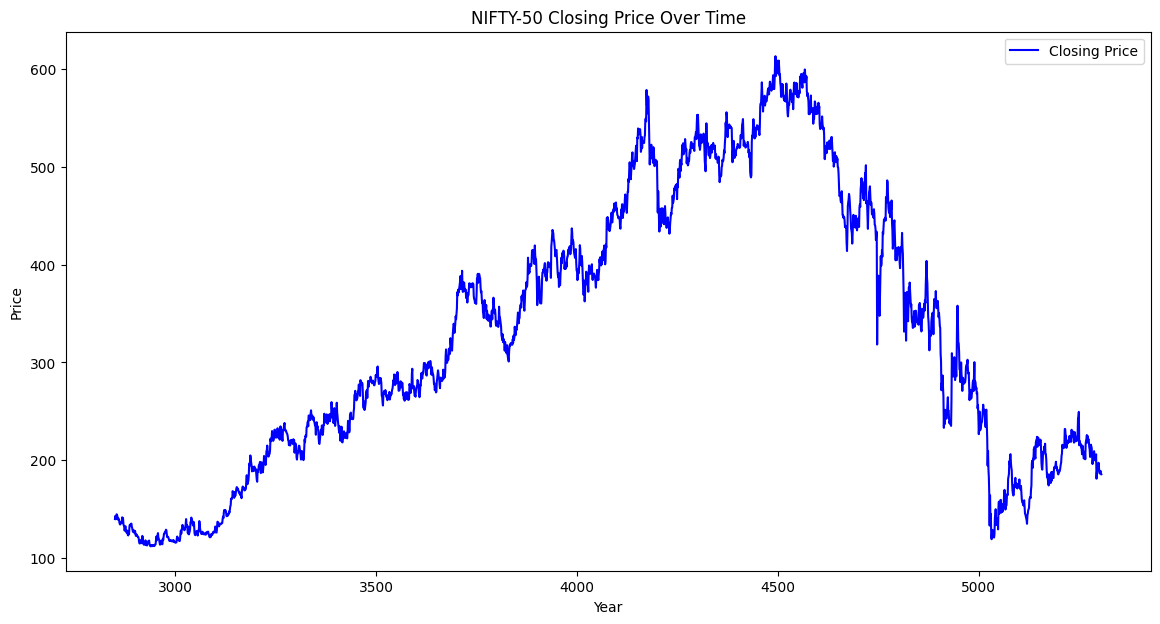

In [20]:
#Visualizing the closing price over time helps you understand trends.
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Close', label='Closing Price', color='blue')
plt.title('NIFTY-50 Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

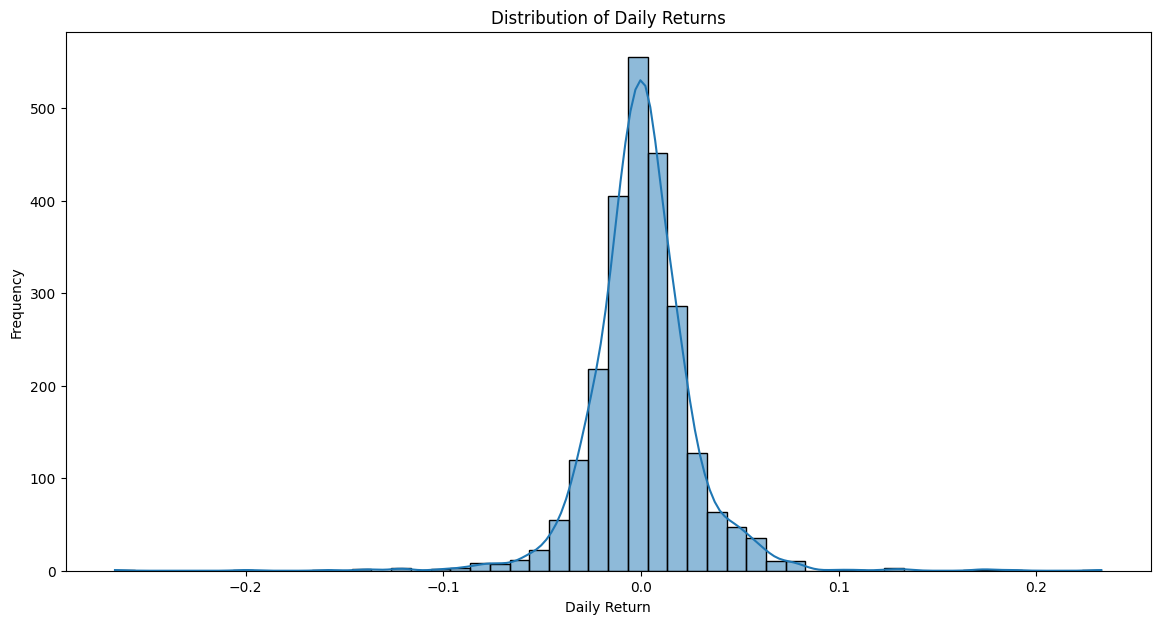

In [21]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

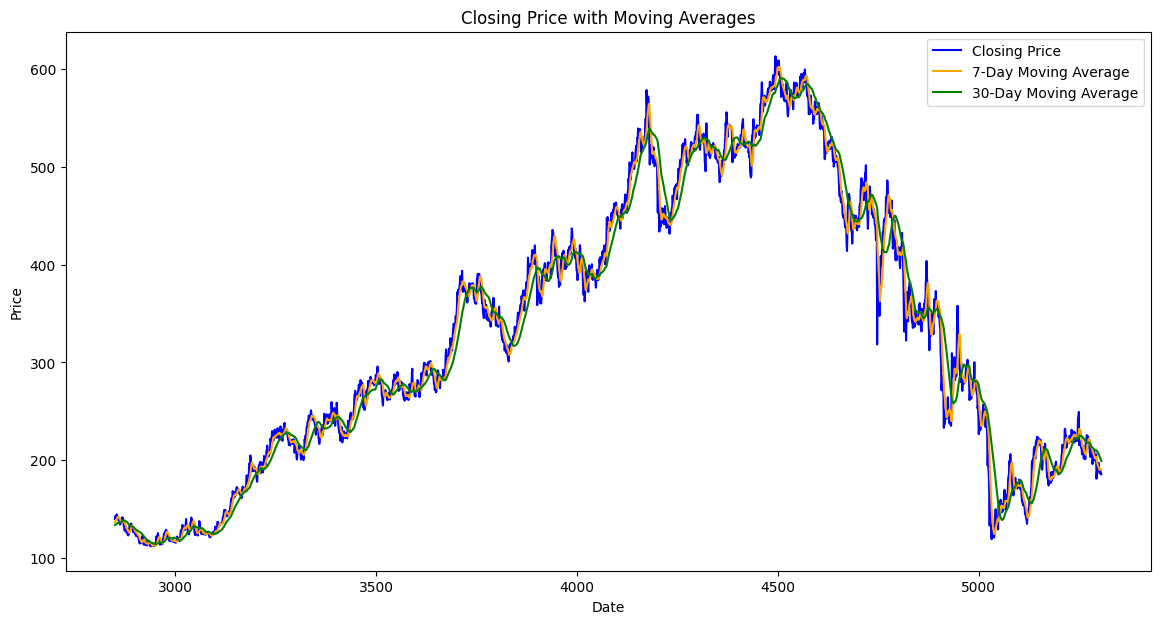

In [22]:
# moving average
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Close', label='Closing Price', color='blue')
sns.lineplot(data=df, x=df.index, y='MA7', label='7-Day Moving Average', color='orange')
sns.lineplot(data=df, x=df.index, y='MA30', label='30-Day Moving Average', color='green')
plt.title('Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


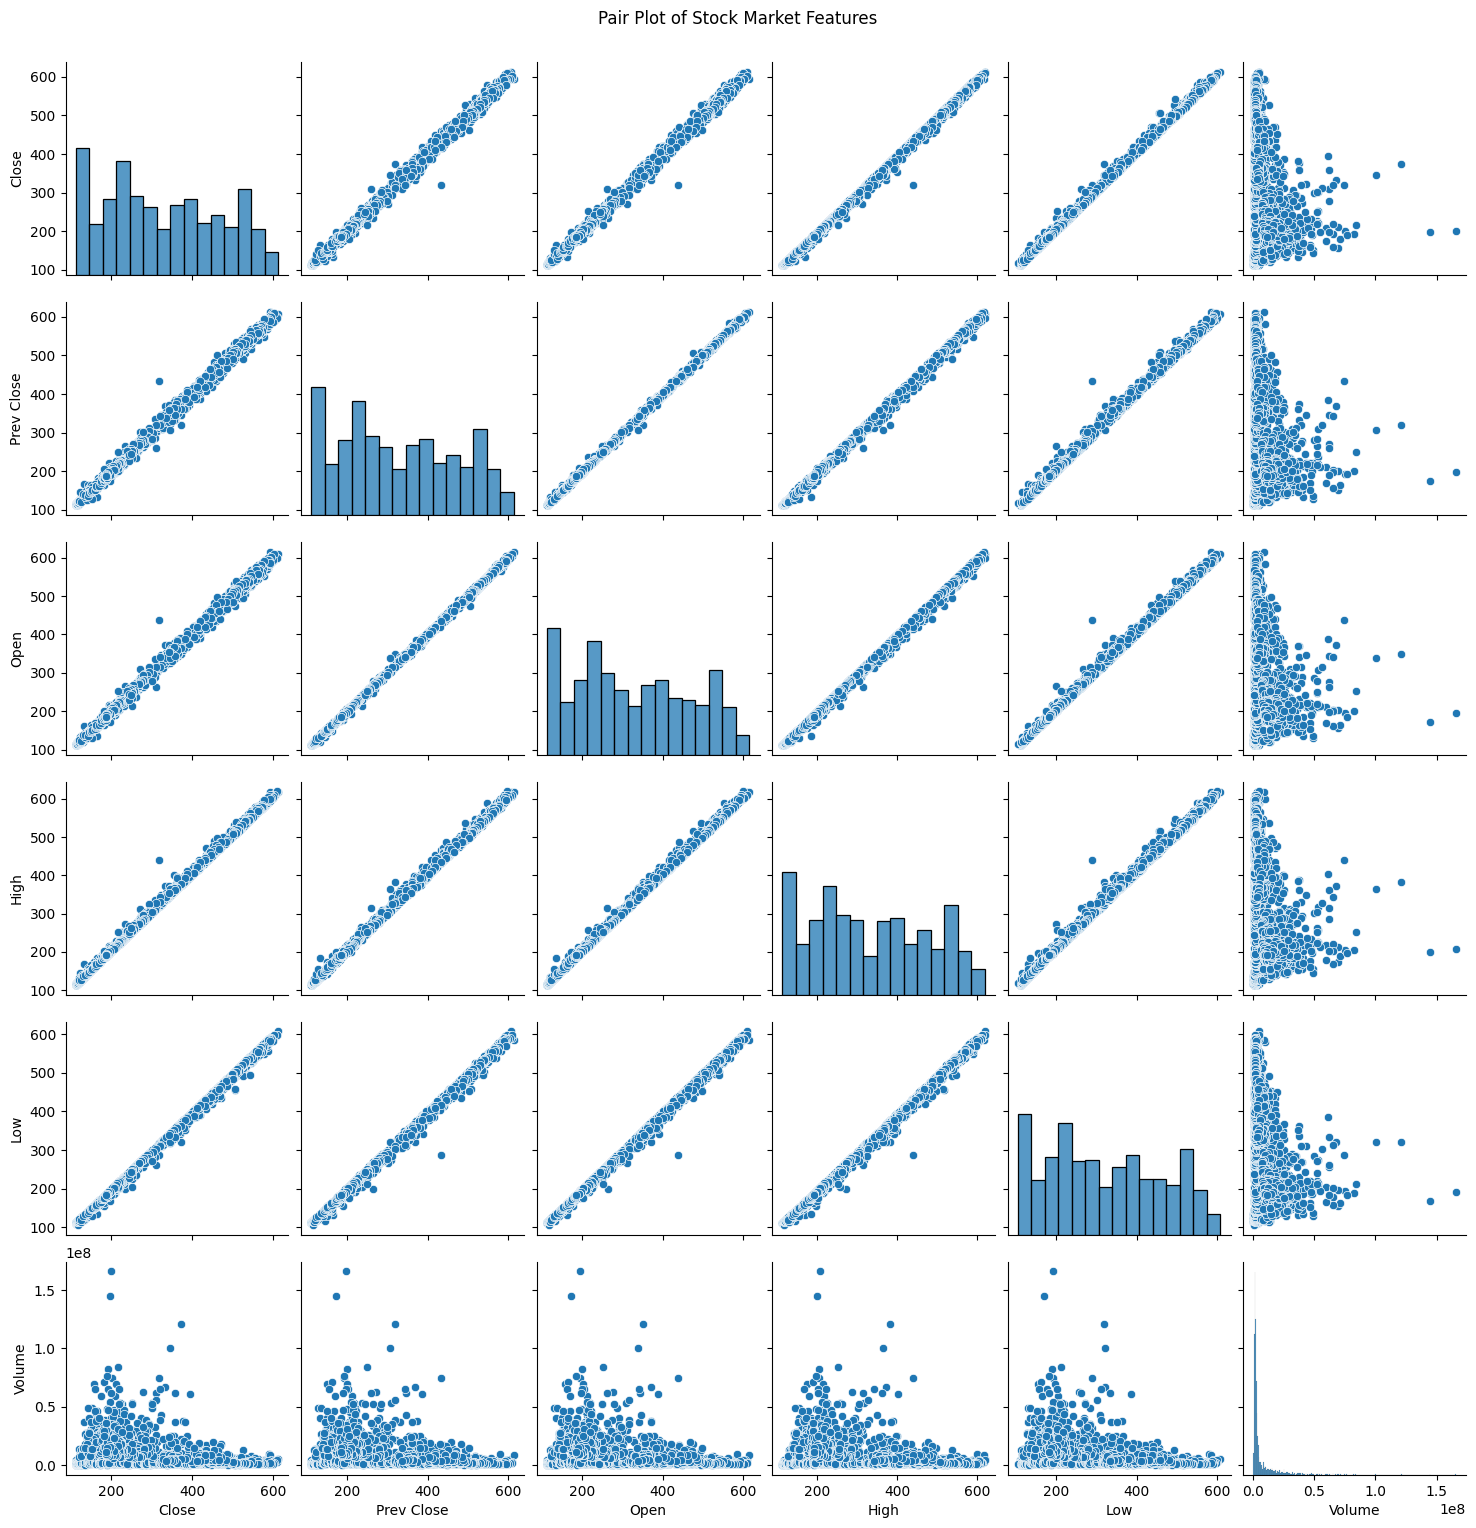

In [23]:
sns.pairplot(df[['Close', 'Prev Close', 'Open', 'High', 'Low', 'Volume']])
plt.suptitle('Pair Plot of Stock Market Features', y=1.02)
plt.show()

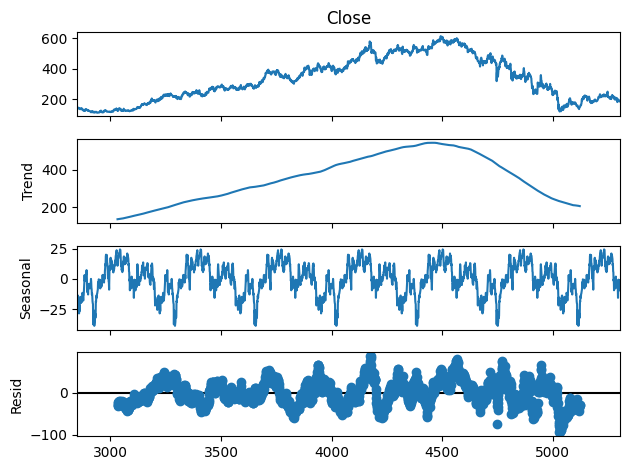

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=365)
result.plot()
plt.show()

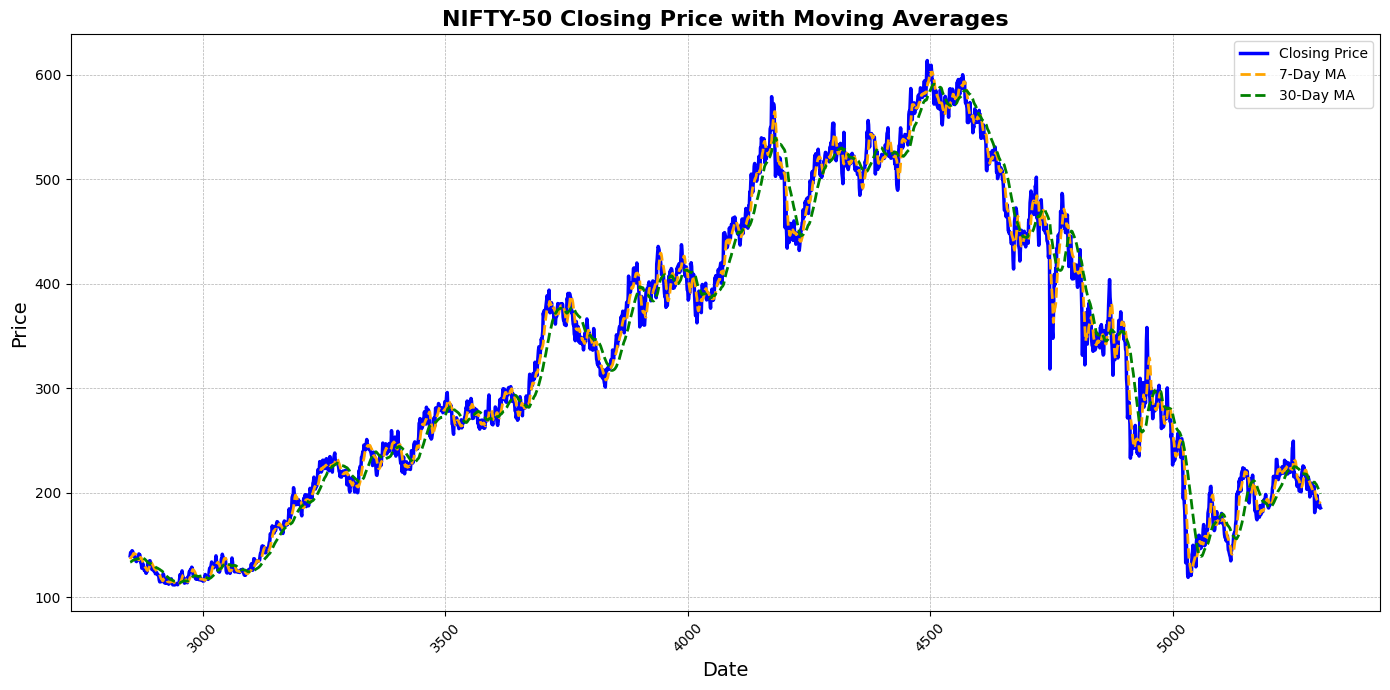

In [26]:
# Using matplotlib
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price', linewidth=2.5)
plt.plot(df.index, df['MA7'], color='orange', label='7-Day MA', linewidth=2, linestyle='--')
plt.plot(df.index, df['MA30'], color='green', label='30-Day MA', linewidth=2, linestyle='--')
plt.title('NIFTY-50 Closing Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

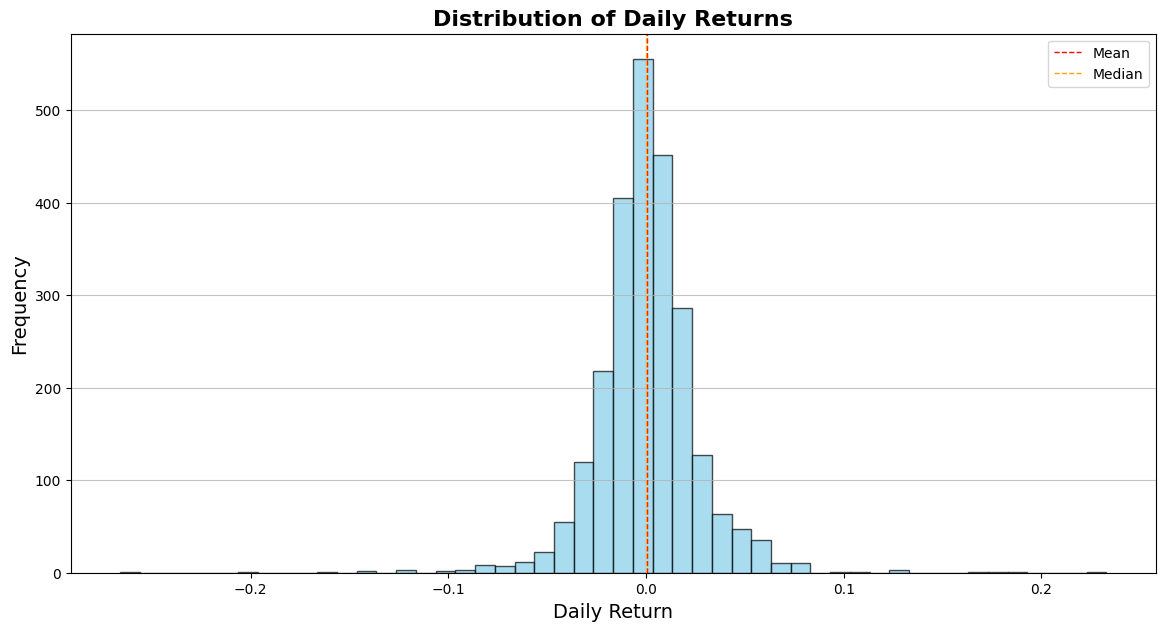

In [27]:
plt.figure(figsize=(14, 7))
plt.hist(df['Daily Return'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Returns', fontsize=16, fontweight='bold')
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df['Daily Return'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Daily Return'].median(), color='orange', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

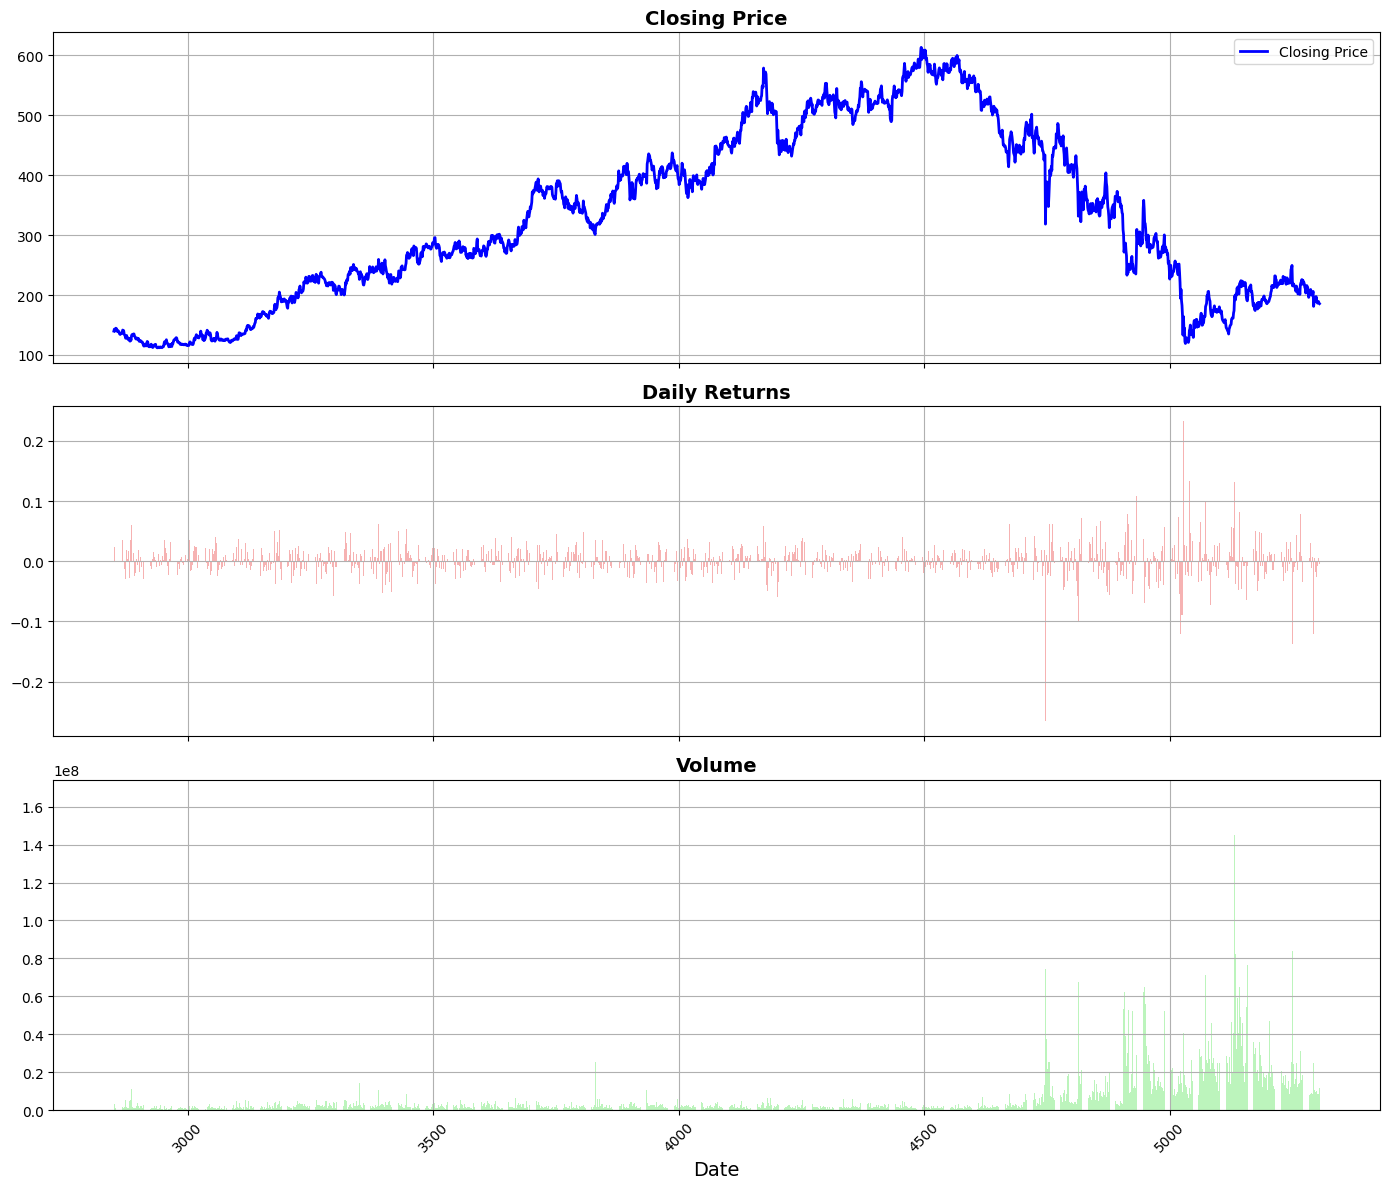

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Closing Price
axs[0].plot(df.index, df['Close'], color='blue', label='Closing Price', linewidth=2)
axs[0].set_title('Closing Price', fontsize=14, fontweight='bold')
axs[0].legend()
axs[0].grid()

# Daily Returns
axs[1].bar(df.index, df['Daily Return'], color='lightcoral', alpha=0.6)
axs[1].set_title('Daily Returns', fontsize=14, fontweight='bold')
axs[1].grid()

# Volume
axs[2].bar(df.index, df['Volume'], color='lightgreen', alpha=0.6)
axs[2].set_title('Volume', fontsize=14, fontweight='bold')
axs[2].grid()

plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Closing Price', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['MA7'], mode='lines', name='7-Day MA', line=dict(color='orange', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['MA30'], mode='lines', name='30-Day MA', line=dict(color='green', width=2, dash='dash')))

fig.update_layout(title='NIFTY-50 Closing Price with Moving Averages', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [33]:
fig = px.histogram(df['Daily Return'].dropna(), nbins=50, title='Distribution of Daily Returns', 
                   labels={'value': 'Daily Return', 'count': 'Frequency'}, 
                   color_discrete_sequence=['skyblue'])

fig.update_layout(xaxis_title='Daily Return', yaxis_title='Frequency')
fig.show()

In [34]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'],
                                      name='Candlestick')])

fig.update_layout(title='NIFTY-50 Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [37]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, subplot_titles=('Closing Price', 'Daily Returns', 'Volume'))

# Closing Price
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Closing Price', line=dict(color='blue')), row=1, col=1)

# Daily Returns
fig.add_trace(go.Bar(x=df.index, y=df['Daily Return'], name='Daily Returns', marker=dict(color='red')), row=2, col=1)

# Volume
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name='Volume', marker=dict(color='lightgreen')), row=3, col=1)

fig.update_layout(title='NIFTY-50 Stock Market Analysis', height=800)
fig.show()

In [39]:
fig = go.Figure(data=go.Scatter3d(
    x=df.index,
    y=df['Close'],
    z=df['Volume'],
    mode='markers',
    marker=dict(size=5, color='purple', opacity=0.8)
))

fig.update_layout(title='3D Scatter Plot of Closing Prices and Volume',
                  scene=dict(xaxis_title='Date',
                             yaxis_title='Closing Price',
                             zaxis_title='Volume'))
fig.show()

In [40]:
fig = px.area(df, x=df.index, y='Close', title='Area Chart of Closing Prices', 
              labels={'Close': 'Closing Price'})

fig.update_layout(yaxis_title='Price', xaxis_title='Date')
fig.show()

Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
data = df[['Close']]

# Normalizing the data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

C:\Users\admin\AppData\Local\Temp\ipykernel_65912\3540978068.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Creating a function to create a dataset for time series forecasting
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [44]:
time_step = 10
X, y = create_dataset(data.values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ARIMA

In [45]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [65]:
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.3525881451946387
p-value: 0.6047833002679133


In [47]:
# Fit the ARIMA model (choose p, d, q parameters)
model = ARIMA(data['Close'], order=(5, 1, 0))  # You can fine-tune these parameters
model_fit = model.fit()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [50]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2456
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6707.958
Date:                Sun, 29 Sep 2024   AIC                         -13403.916
Time:                        14:05:39   BIC                         -13369.081
Sample:                             0   HQIC                        -13391.257
                               - 2456                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0773      0.009     -8.387      0.000      -0.095      -0.059
ar.L2         -0.0476      0.016     -3.045      0.002      -0.078      -0.017
ar.L3         -0.0605      0.016     -3.832      0.0

In [54]:
forecast = model_fit.forecast(steps=30)
print(forecast.index)

RangeIndex(start=2456, stop=2486, step=1)


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



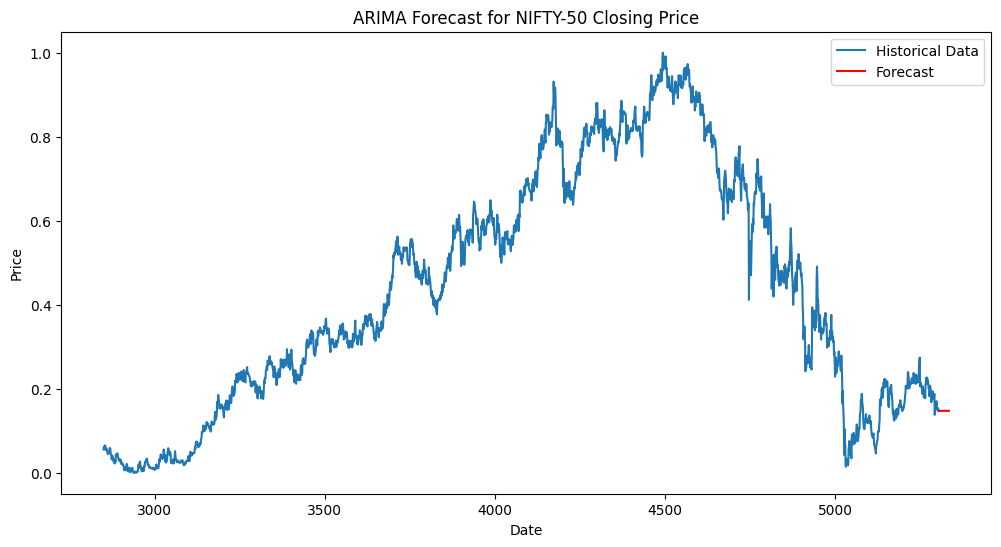

In [62]:
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(forecast.index+2850, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for NIFTY-50 Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()